In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
# Import dataset
chatlogs = pd.read_csv('chatlogs.csv')
chatlogs.head()

,Unnamed: 0,message,association_to_offender,time,case_total_reports,allied_report_count,enemy_report_count,most_common_report_reason,chatlog_id,champion_name
0,0,gold 2 zed,enemy,00:00:21,8,0,2,Negative Attitude,1,Udyr
1,1,IIII,enemy,00:00:27,8,0,2,Negative Attitude,1,Riven
2,2,nice premade lie :o,enemy,00:00:27,8,0,2,Negative Attitude,1,Udyr
3,3,ISI,enemy,00:00:28,8,0,2,Negative Attitude,1,Riven
4,4,smiteless pls,enemy,00:00:43,8,0,2,Negative Attitude,1,Udyr


In [3]:
# Total # of games
total_games = 10058

## Exploratory Data Analysis
- Graphs, Plots, Charts, and Word Cloud to explore the dataset

In [4]:
# Look at dataset
# Check for missing values

print(len(chatlogs))
missing_values = chatlogs.isnull().sum()
print("Missing values per column:\n", missing_values)

# Summary statistics
print(chatlogs.describe())

1697222
Missing values per column:
 Unnamed: 0                     0
message                       29
association_to_offender      104
time                           0
case_total_reports             0
allied_report_count            0
enemy_report_count             0
most_common_report_reason      0
chatlog_id                     0
champion_name                104
dtype: int64
         Unnamed: 0  case_total_reports  allied_report_count  \
count  1.697222e+06        1.697222e+06         1.697222e+06   
mean   8.486105e+05        5.901944e+00         1.388880e+00   
std    4.899459e+05        2.266064e+00         8.856219e-01   
min    0.000000e+00        2.000000e+00         0.000000e+00   
25%    4.243052e+05        5.000000e+00         1.000000e+00   
50%    8.486105e+05        6.000000e+00         1.000000e+00   
75%    1.272916e+06        7.000000e+00         2.000000e+00   
max    1.697221e+06        2.300000e+01         4.000000e+00   

       enemy_report_count    chatlog_id  
co

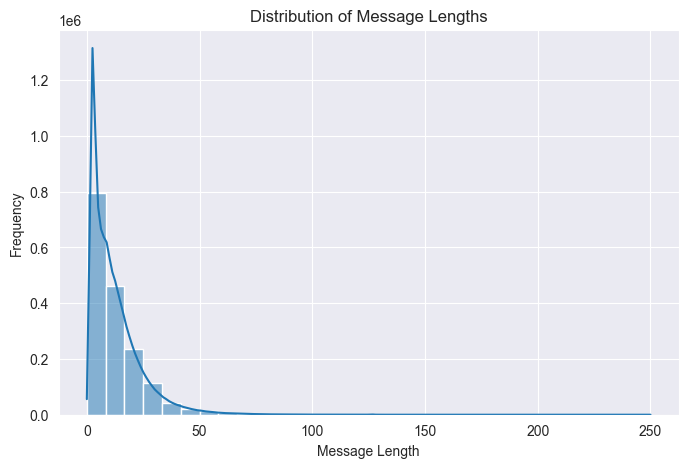

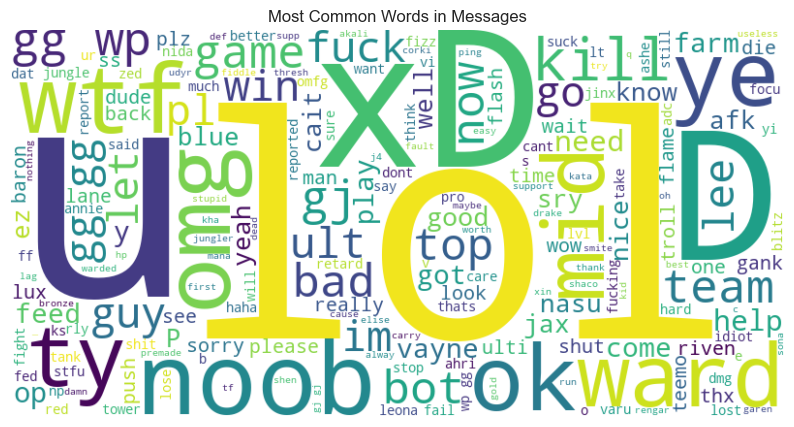

In [5]:
# Add a column for message length
# Ensure all entries in the 'messages' column are strings
chatlogs['message'] = chatlogs['message'].fillna("").astype(str)
chatlogs['message_length'] = chatlogs['message'].apply(len)

# Plot distribution of message lengths
plt.figure(figsize=(8, 5))
sns.histplot(chatlogs['message_length'], bins=30, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


# Word cloud for messages
text = " ".join(msg for msg in chatlogs['message'])
wordcloud = WordCloud(background_color="white", max_words=200, width=800, height=400).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Messages")
plt.show()


ValueError: We need at least 1 word to plot a word cloud, got 0.

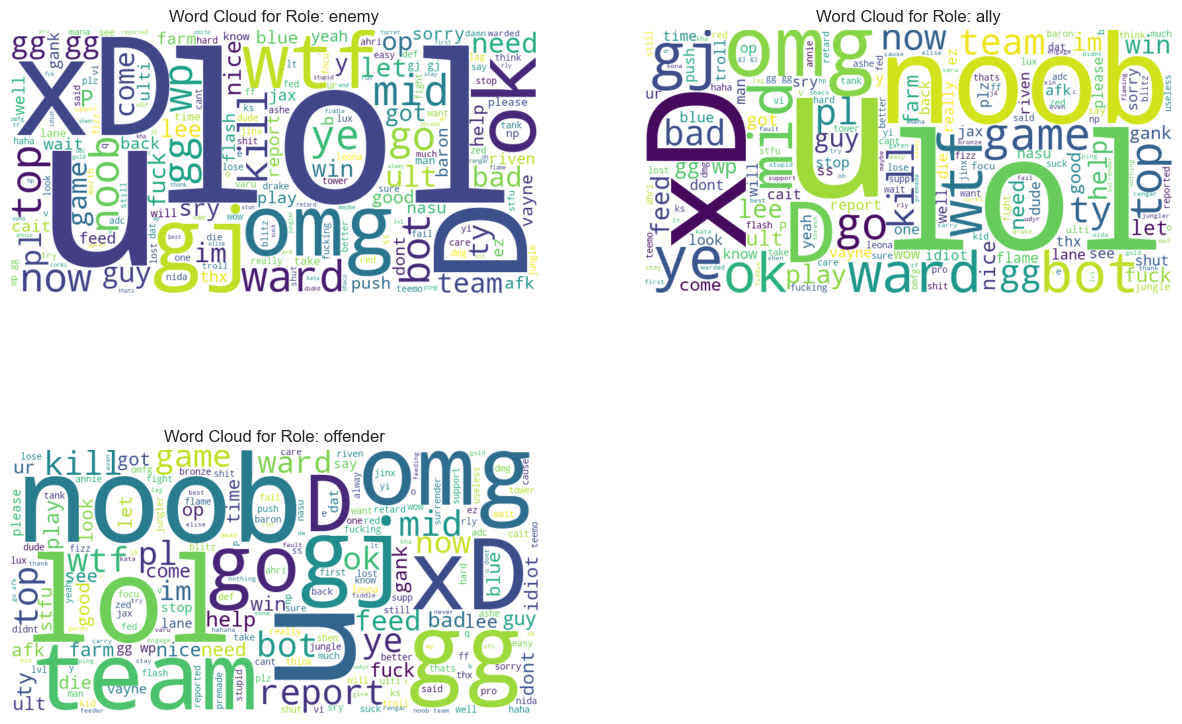

In [6]:
# Generate word clouds for each role
roles = chatlogs['association_to_offender'].unique()

plt.figure(figsize=(15, 10))
for i, role in enumerate(roles, 1):
    # Filter messages by role
    role_text = " ".join(msg for msg in chatlogs.loc[chatlogs['association_to_offender'] == role, 'message'].dropna())
    
    # Generate word cloud
    wordcloud = WordCloud(background_color="white", max_words=200, width=800, height=400).generate(role_text)
    
    # Plot each word cloud
    plt.subplot(2, (len(roles) + 1) // 2, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Role: {role}")

plt.tight_layout()
plt.show()

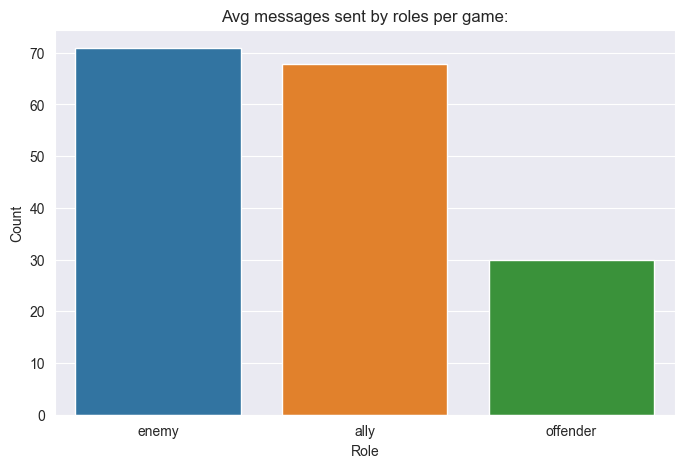

In [7]:
# Frequency count of roles
role_counts = chatlogs['association_to_offender'].value_counts()/ total_games

# Bar plot for roles
plt.figure(figsize=(8, 5))
sns.barplot(x=role_counts.index, y=role_counts.values, hue = role_counts.index, legend=False)
plt.title('Avg messages sent by roles per game:')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()


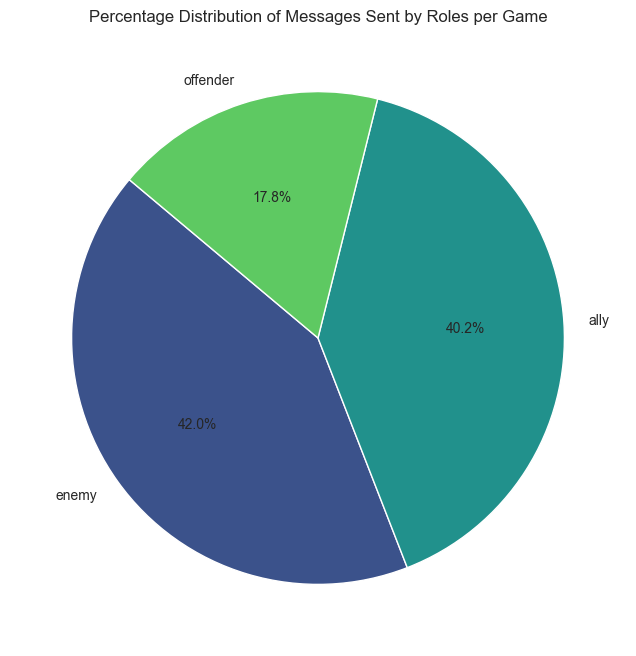

In [8]:
# Calculate percentage distribution of roles
role_percentage = chatlogs['association_to_offender'].value_counts(normalize=True) * 100

# Pie chart for percentage of roles
plt.figure(figsize=(8, 8))
plt.pie(
    role_percentage.values, 
    labels=role_percentage.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('viridis', len(role_percentage))
)
plt.title('Percentage Distribution of Messages Sent by Roles per Game')
plt.show()

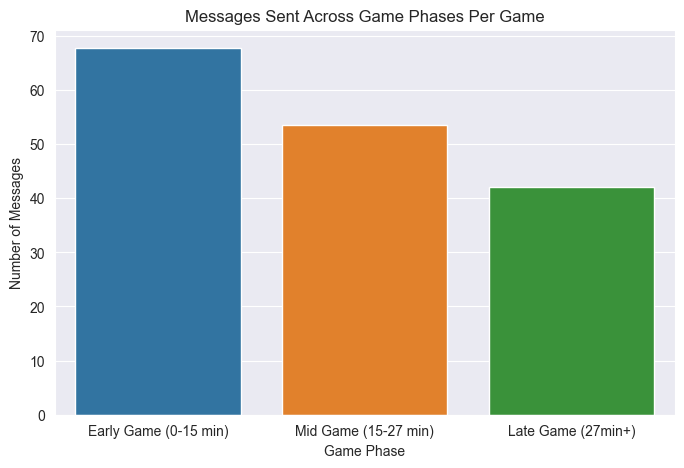

In [9]:
# Convert 'time' to datetime and extract periods
chatlogs['time'] = pd.to_datetime(chatlogs['time'], format='%H:%M:%S')
chatlogs['game_phase'] = pd.cut(
    chatlogs['time'].dt.hour * 60 + chatlogs['time'].dt.minute, 
    bins=[0, 15, 27, 300],  # 0 - 15 min, 15 - 27 min, 27+ minutes
    labels=['Early Game (0-15 min)', 'Mid Game (15-27 min)', 'Late Game (27min+)']
)

# Messages by game phase
phase_counts = chatlogs['game_phase'].value_counts()/total_games

plt.figure(figsize=(8, 5))
sns.barplot(x=phase_counts.index, y=phase_counts.values, hue = phase_counts.index, legend=False)
plt.title('Messages Sent Across Game Phases Per Game')
plt.xlabel('Game Phase')
plt.ylabel('Number of Messages')
plt.show()


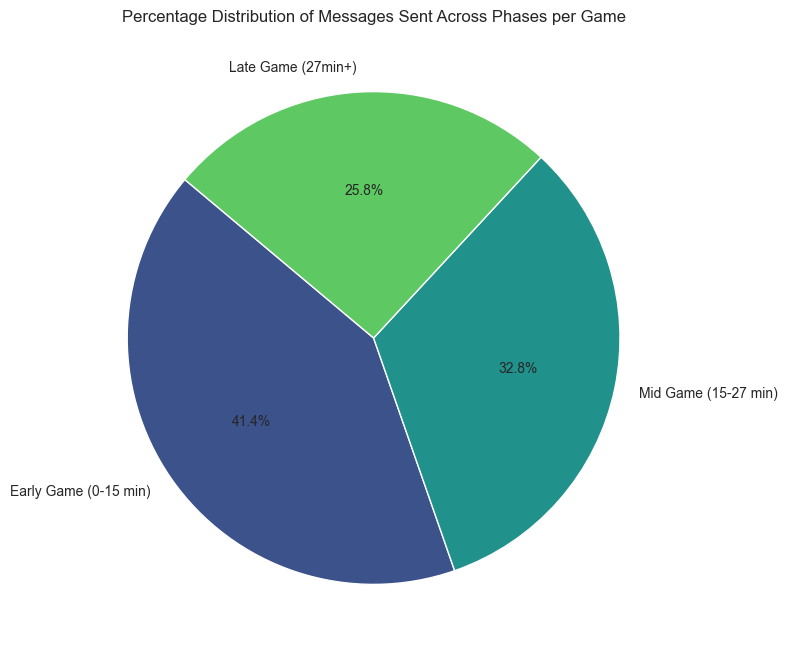

In [10]:
# Calculate percentage distribution of game phases
phase_percentage = chatlogs['game_phase'].value_counts(normalize=True) * 100

# Pie chart for percentage of roles
plt.figure(figsize=(8, 8))
plt.pie(
    phase_percentage.values, 
    labels=phase_percentage.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('viridis', len(role_percentage))
)
plt.title('Percentage Distribution of Messages Sent Across Phases per Game')
plt.show()

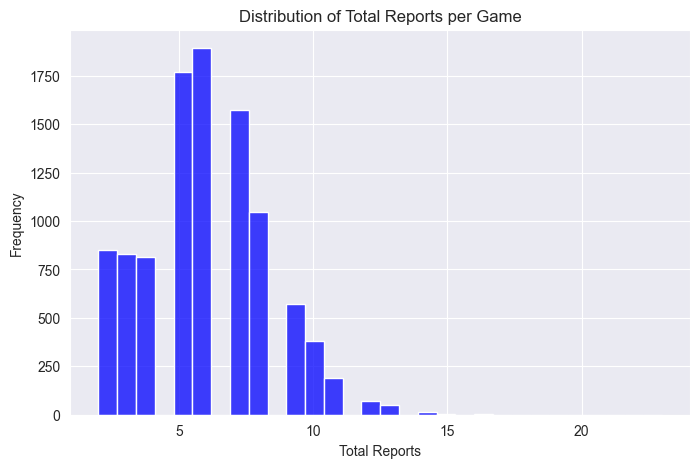

In [12]:
# Group by chatlog_id to get one row per game
total_reports_per_game = chatlogs.groupby('chatlog_id')['case_total_reports'].first()

# Plot the distribution of total reports
plt.figure(figsize=(8, 5))
sns.histplot(total_reports_per_game, bins=30, color='blue')
plt.title('Distribution of Total Reports per Game')
plt.xlabel('Total Reports')
plt.ylabel('Frequency')
plt.show()


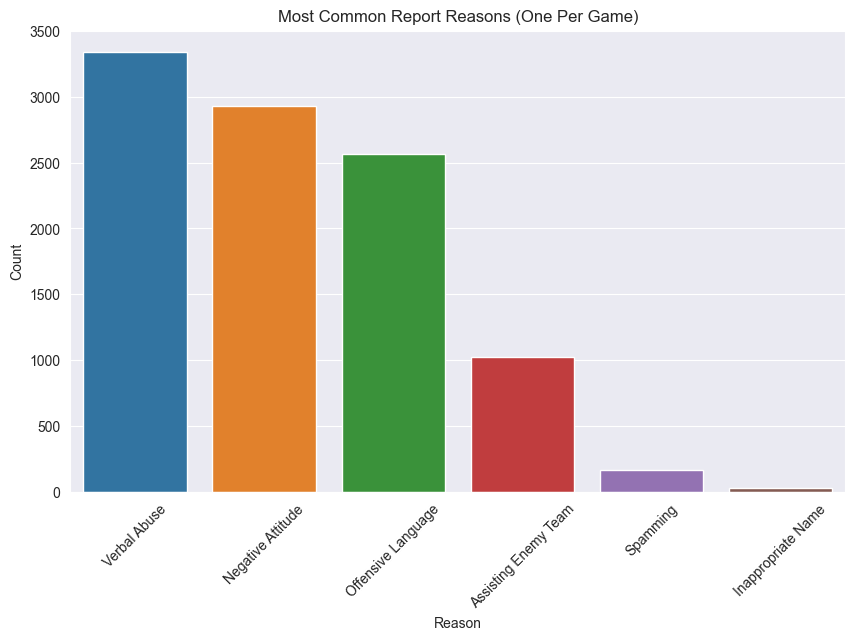

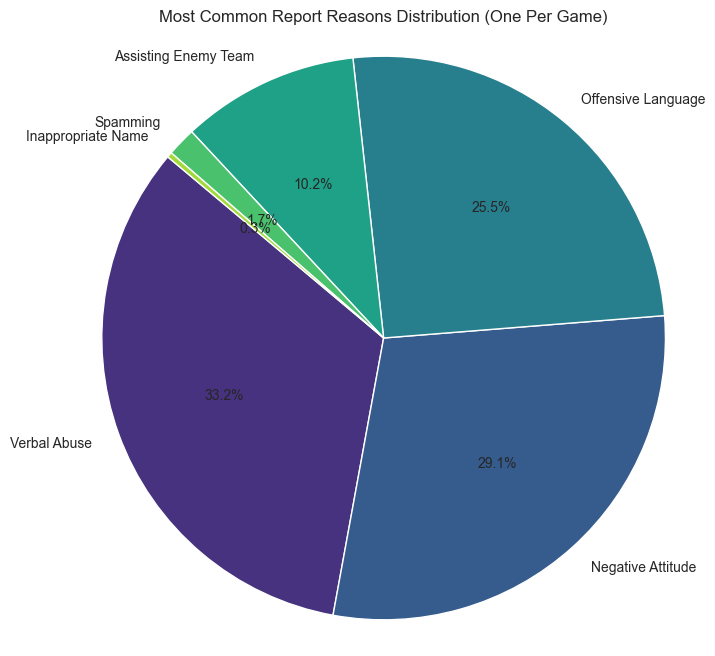

In [14]:
# Extract one value of most_common_report_reason per game by grouping by chatlog_id
unique_report_reasons = chatlogs.groupby('chatlog_id')['most_common_report_reason'].first()

# Count occurrences of each unique report reason
reason_counts = unique_report_reasons.value_counts()

# Bar plot for most common report reasons
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_counts.index, y=reason_counts.values, hue = reason_counts.index, legend=False)
plt.title('Most Common Report Reasons (One Per Game)')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for most common report reasons
plt.figure(figsize=(8, 8))
plt.pie(reason_counts, labels=reason_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(reason_counts)))
plt.title('Most Common Report Reasons Distribution (One Per Game)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


    Champion  Count  Percentage
0    Lee Sin    396    3.983102
1      Vayne    272    2.735868
2     Ezreal    263    2.645343
3      Riven    251    2.524643
4    Caitlyn    227    2.283243
5    Nidalee    223    2.243009
6        Jax    190    1.911084
7       Jinx    186    1.870851
8      Teemo    175    1.760209
9  Master Yi    168    1.689801


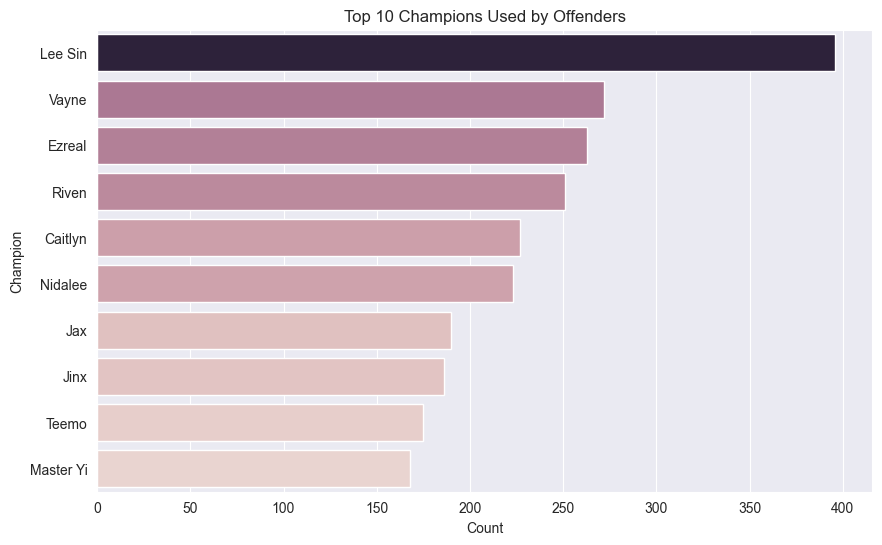

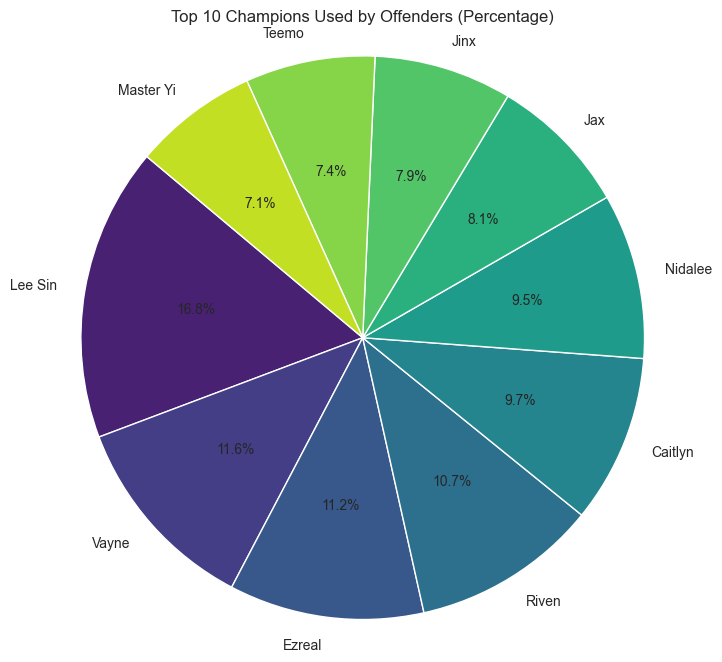

In [15]:
# Group by 'chatlog_id' and identify 'champion_name' of the offender
offender_champions = chatlogs[chatlogs['association_to_offender'] == 'offender'].groupby('chatlog_id')['champion_name'].first()

# Count occurrences of each champion and calculate percentages
champion_counts = offender_champions.value_counts()
champion_percentages = (champion_counts / len(offender_champions)) * 100

# Get the top 10 champions
top_10_champions = champion_counts.head(10)
top_10_percentages = champion_percentages.head(10)

# Combine into a DataFrame for better display
top_10_df = pd.DataFrame({
    'Champion': top_10_champions.index,
    'Count': top_10_champions.values,
    'Percentage': top_10_percentages.values
})

# Display the top 10 champions
print(top_10_df)

# Bar plot for top 10 champions
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Champion', data=top_10_df, hue='Count', legend=False)
plt.title('Top 10 Champions Used by Offenders')
plt.xlabel('Count')
plt.ylabel('Champion')
plt.show()

# Pie chart for top 10 champions
plt.figure(figsize=(8, 8))
plt.pie(top_10_df['Percentage'], labels=top_10_df['Champion'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_10_df)))
plt.title('Top 10 Champions Used by Offenders (Percentage)')
plt.axis('equal')
plt.show()
